In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
file = pd.read_csv("Wholesale customers data.csv")

file.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
x = file.iloc[:,:].values

In [10]:
print(x)

[[    2     3 12669 ...   214  2674  1338]
 [    2     3  7057 ...  1762  3293  1776]
 [    2     3  6353 ...  2405  3516  7844]
 ...
 [    2     3 14531 ...   437 14841  1867]
 [    1     3 10290 ...  1038   168  2125]
 [    1     3  2787 ...    65   477    52]]


In [14]:
file.shape

(440, 8)

In [23]:
#trying DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances,indices = nbrs.kneighbors(x)

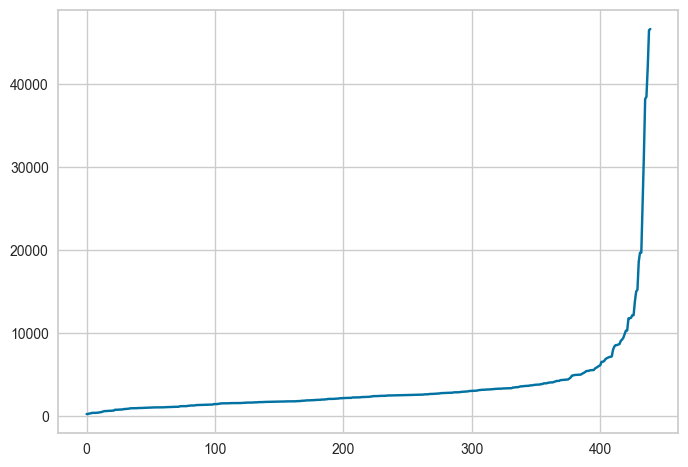

In [24]:
distances = np.sort(distances,axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [25]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [26]:
sc = StandardScaler()

xsc = sc.fit_transform(file)
xnor = normalize(xsc)

cus = pd.DataFrame(xnor)

In [27]:
pca = PCA(n_components = 2)
Xpr = pca.fit_transform(cus)
cus = pd.DataFrame(Xpr)
cus.columns = ['X1','X2']
cus.head()

,X1,X2
0,0.808828,-0.381932
1,0.914432,-0.401807
2,0.659273,-0.173878
3,-0.648142,-0.155067
4,0.562708,-0.107969


In [28]:
db = DBSCAN(eps = 0.0375, min_samples = 10).fit(cus)
lb = db.labels_

In [29]:
np.unique(lb)

array([-1,  0,  1,  2], dtype=int64)

In [20]:
col = {}
col[0] = 'r'
col[1] = 'g'
col[2] = 'b'
col[-1] = 'k'

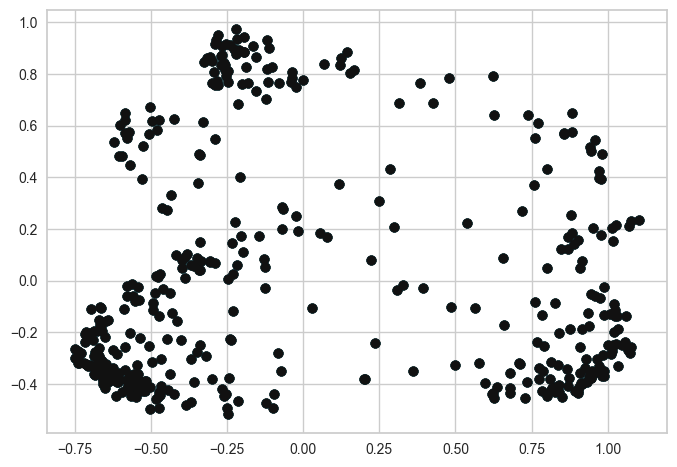

In [30]:
cv = [col[label] for label in lb]

r = plt.scatter(cus['X1'], cus['X2'], marker = 'o', color = col[0])
g = plt.scatter(cus['X1'], cus['X2'], marker = 'o', color = col[1])
b = plt.scatter(cus['X1'], cus['X2'], marker = 'o', color = col[2])
k = plt.scatter(cus['X1'], cus['X2'], marker = 'o', color = col[-1])

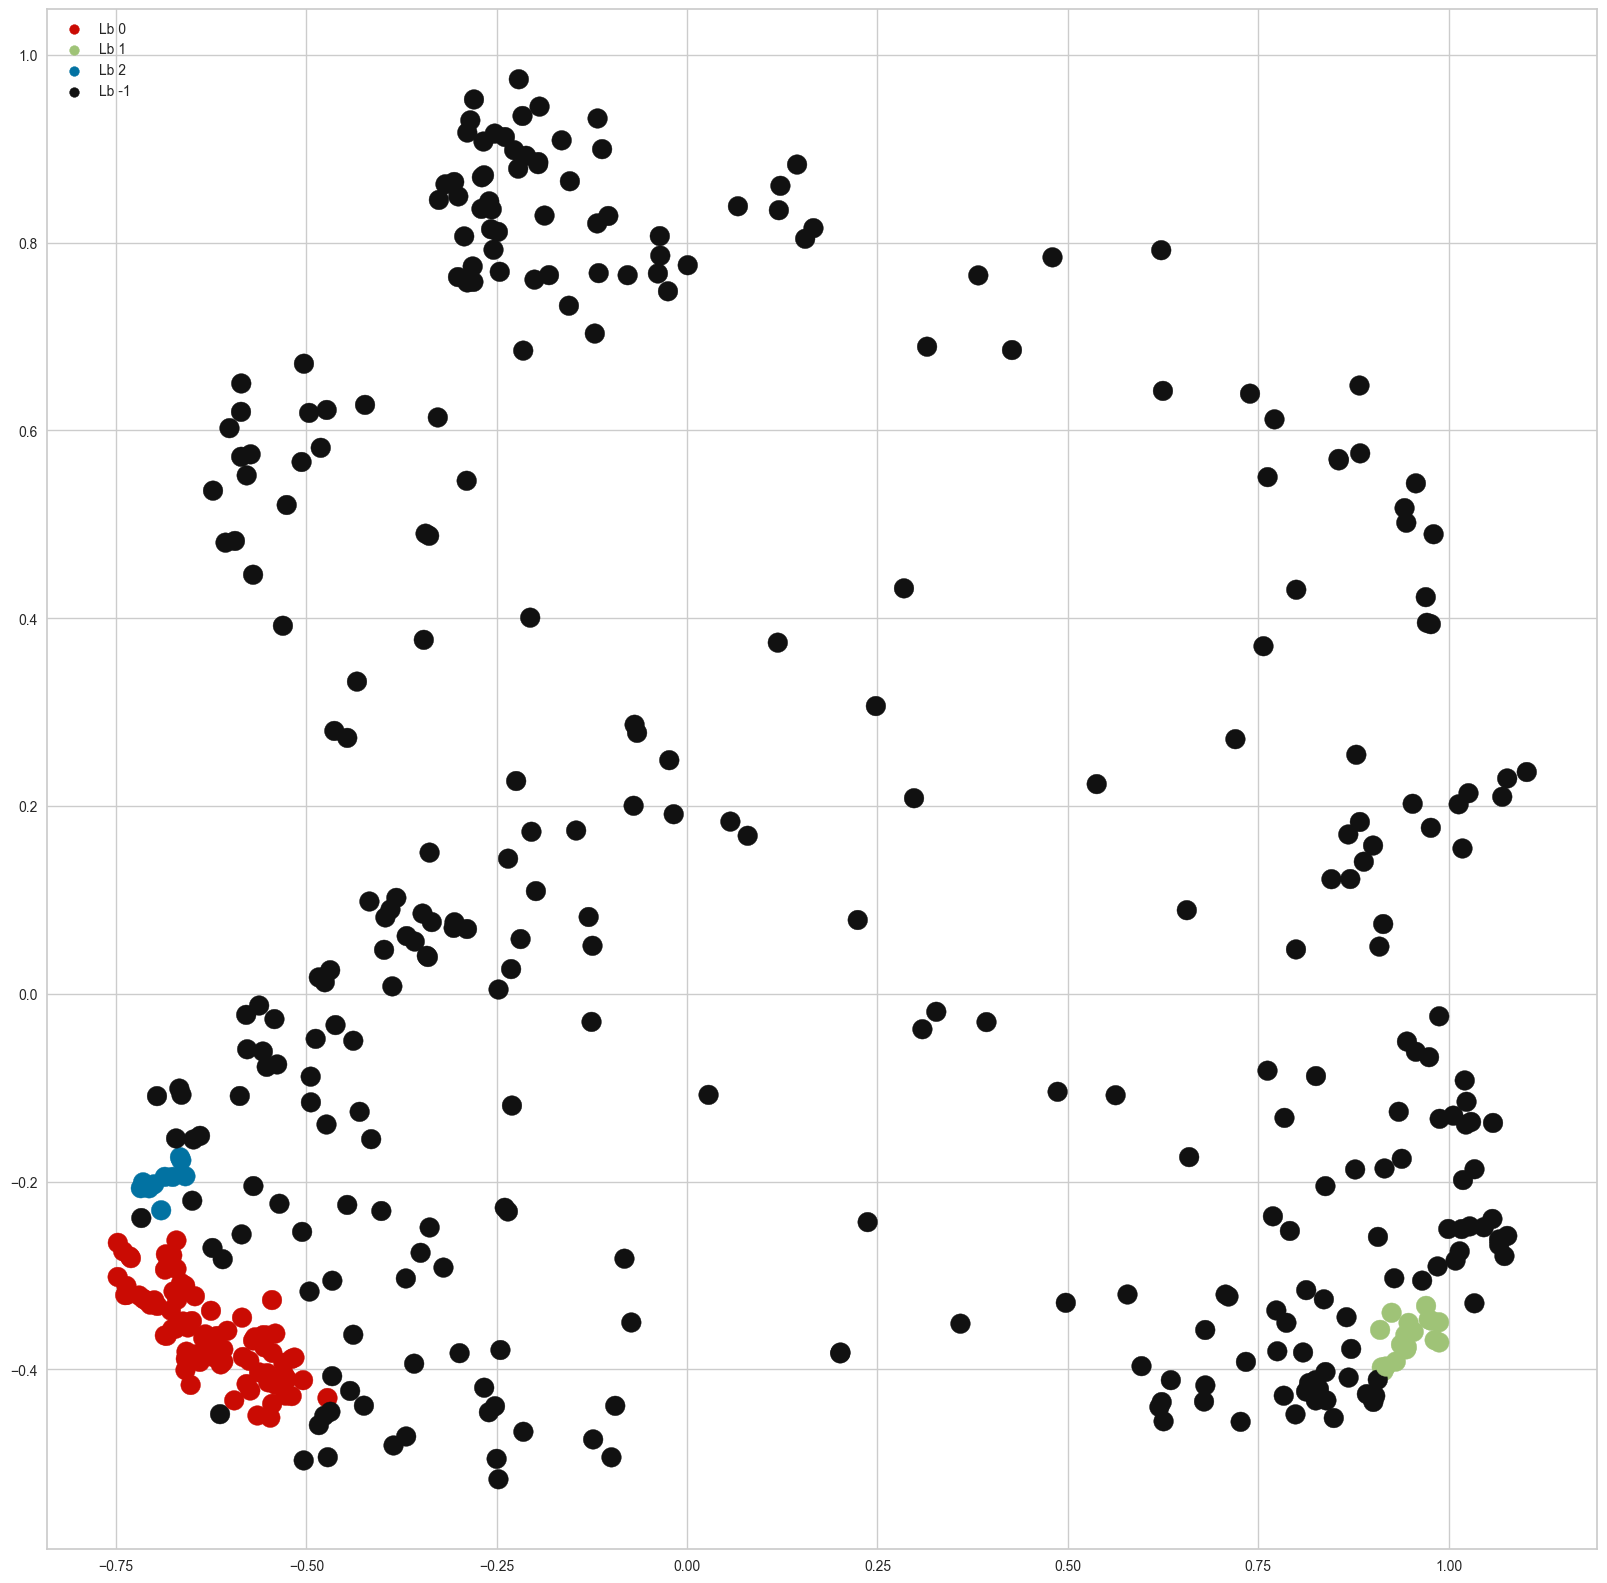

In [31]:
plt.figure(figsize  = (20,20))
plt.scatter(cus['X1'],cus['X2'], c = cv, s = 200)

plt.legend((r,g,b,k), ('Lb 0','Lb 1','Lb 2','Lb -1'),
          fontsize = 10, loc = 'upper left')